# Explore here

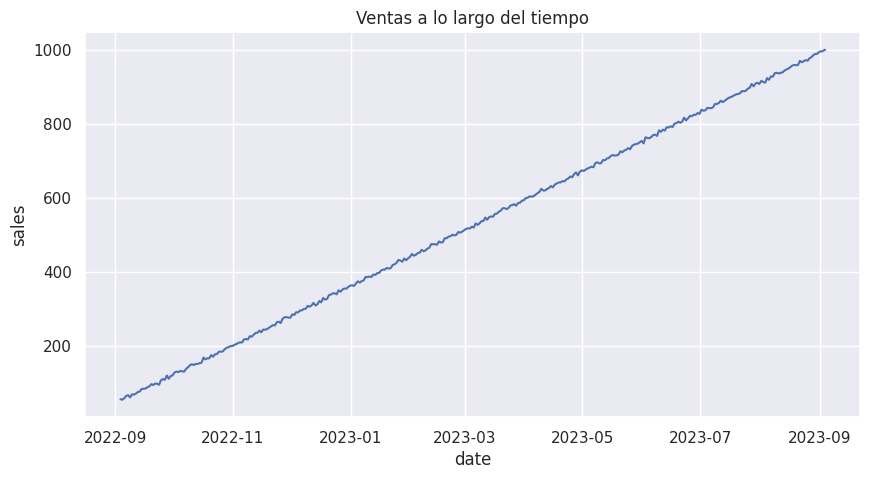

Resultados de la prueba de Dickey-Fuller:
Estadística de prueba               0.545414
p-valor                             0.986190
#Lags Used                         13.000000
Número de observaciones usadas    352.000000
Valor crítico (1%)                 -3.449065
Valor crítico (5%)                 -2.869786
Valor crítico (10%)                -2.571163
dtype: float64


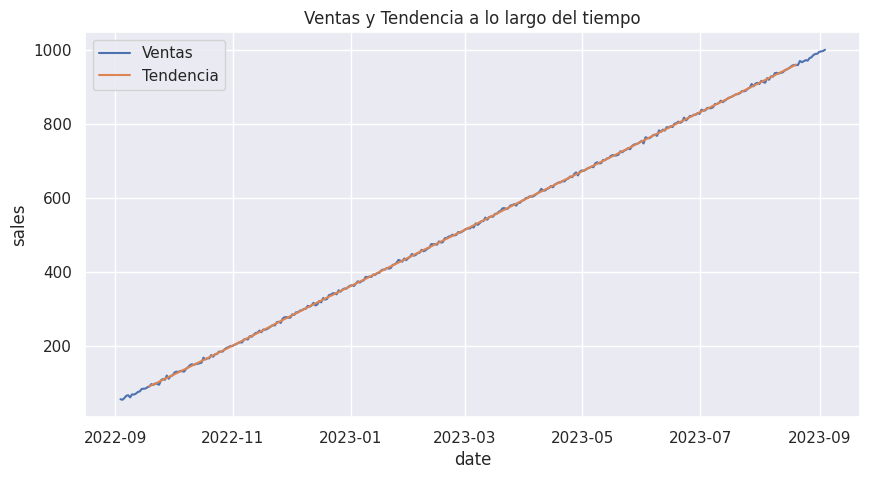

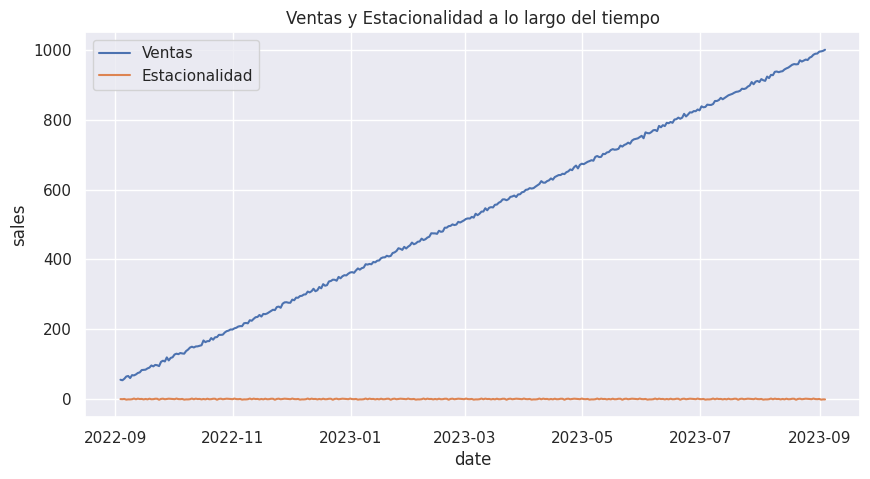

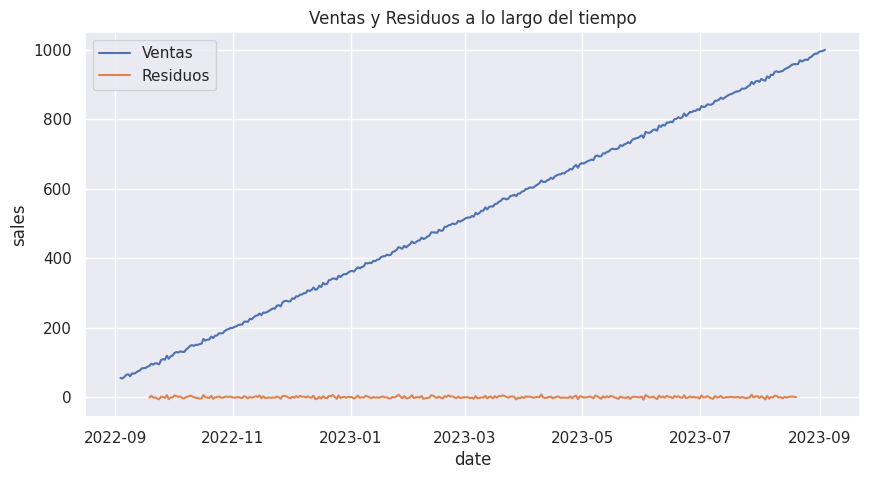

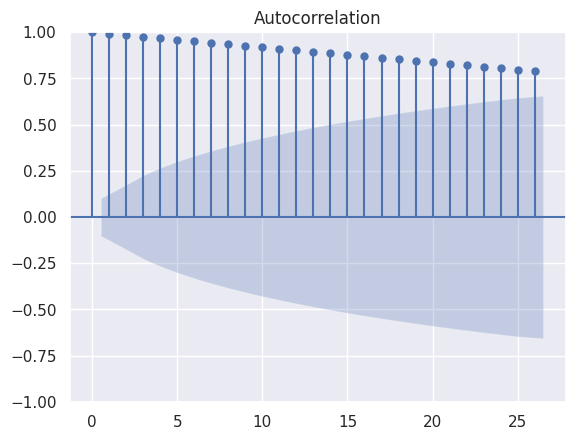

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.226
Date:                Thu, 01 Aug 2024   AIC                           2104.453
Time:                        08:30:33   BIC                           2116.153
Sample:                    09-03-2022   HQIC                          2109.103
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1194.486      0.000       0.998       1.002
ma.L1         -0.9996      0.679     -1.471      0.141      -2.331       0.332
sigma2        18.1401     12.421      1.460      0.1

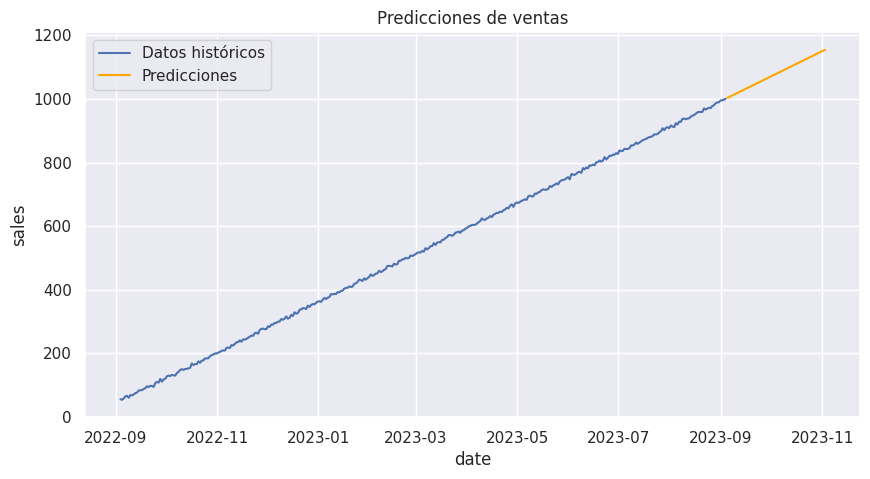

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import joblib

# Paso 1: Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
total_data = pd.read_csv(url)

# Transformar cadena de fecha a objeto Datetime
total_data["date"] = pd.to_datetime(total_data.date)
total_data = total_data.set_index("date")
ts_total = total_data["sales"]

# Trazar la serie temporal
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=ts_total)
plt.title("Ventas a lo largo del tiempo")
plt.show()

# Paso 2: Construir y analizar la serie temporal
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Estadística de prueba", "p-valor", "#Lags Used", "Número de observaciones usadas"])
    for key, value in dftest[4].items():
        dfoutput[f"Valor crítico ({key})"] = value
    print(dfoutput)

test_stationarity(ts_total)

# Descomposición de la serie
decomposition = seasonal_decompose(ts_total, period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Análisis de tendencias
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=ts_total, label="Ventas")
sns.lineplot(data=trend, label="Tendencia")
plt.title("Ventas y Tendencia a lo largo del tiempo")
plt.legend()
plt.show()

# Análisis de estacionalidad
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=ts_total, label="Ventas")
sns.lineplot(data=seasonal, label="Estacionalidad")
plt.title("Ventas y Estacionalidad a lo largo del tiempo")
plt.legend()
plt.show()

# Análisis de variabilidad
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=ts_total, label="Ventas")
sns.lineplot(data=residual, label="Residuos")
plt.title("Ventas y Residuos a lo largo del tiempo")
plt.legend()
plt.show()

# Análisis de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_total)
plt.title("Autocorrelation")
plt.show()

# Paso 3: Entrenar un ARIMA
model = ARIMA(ts_total, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Guardar el modelo
joblib.dump(model_fit, 'arima_model.pkl')

# Paso 4: Predecir con el conjunto de test
forecast_steps = 60
forecast = model_fit.forecast(steps=forecast_steps)

# Crear un nuevo índice para las predicciones
forecast_index = pd.date_range(start=ts_total.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Combinar datos históricos con predicciones
combined = pd.concat([ts_total, forecast_series], axis=0)

# Trazar la serie temporal con predicciones
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=ts_total, label="Datos históricos")
sns.lineplot(data=forecast_series, label="Predicciones", color='orange')
plt.title("Predicciones de ventas")
plt.legend()
plt.show()

    1.	¿Cuál es el tensor de la serie temporal?
El tensor de la serie temporal, que es la unidad de tiempo mínima para la cual hay datos, es diario. Esto se puede observar en el índice de las fechas que se muestran en el dataframe.


    2.	¿Cuál es la tendencia?
La tendencia de la serie temporal es claramente ascendente, lo que indica que las ventas están aumentando con el tiempo. Esto se puede observar en el gráfico de “Ventas y Tendencia a lo largo del tiempo” donde la línea de tendencia sigue una dirección ascendente.


	3.	¿Es estacionaria?
La serie no es estacionaria. Esto se puede concluir a partir del resultado del test de Dickey-Fuller, donde el p-valor es 0.986190, mucho mayor que 0.05. Además, la estadística de prueba (0.545414) es mayor que los valores críticos en todos los niveles de significancia (1%, 5% y 10%).


	4.	¿Existe variabilidad o presencia de ruido?
Existe presencia de variabilidad o ruido en la serie, pero es relativamente bajo en comparación con la tendencia ascendente general. Esto se puede observar en el gráfico de descomposición donde los residuos muestran una variabilidad alrededor de cero pero no tienen una tendencia fuerte ni estacionalidad significativa.
